In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

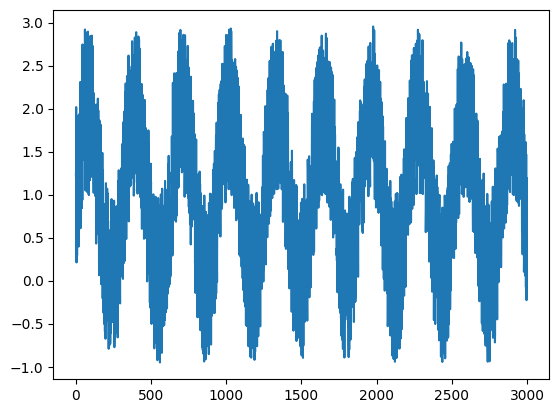

In [2]:
t = np.arange(0, 3000)
x = np.sin(0.02 * t) + np.random.rand(3000) * 2
plt.plot(x)
plt.show()

In [3]:
train, test = x[0:2500], x[2500:]

In [4]:
step = 12

def convertToDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

X_train, y_train = convertToDataset(train, step)
X_test, y_test = convertToDataset(test, step)

In [5]:
X_train.shape

(2488, 12)

In [6]:
X_test.shape

(488, 12)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
X_train.shape

(2488, 12, 1)

In [9]:
X_test.shape

(488, 12, 1)

In [10]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [11]:
model.summary()

ValueError: ignored

In [12]:
history = model.fit(X_train, y_train, epochs=220, batch_size=16, verbose=2)

Epoch 1/220
156/156 - 2s - loss: 0.4199 - 2s/epoch - 14ms/step
Epoch 2/220
156/156 - 0s - loss: 0.3920 - 407ms/epoch - 3ms/step
Epoch 3/220
156/156 - 0s - loss: 0.3854 - 424ms/epoch - 3ms/step
Epoch 4/220
156/156 - 0s - loss: 0.3831 - 409ms/epoch - 3ms/step
Epoch 5/220
156/156 - 0s - loss: 0.3808 - 422ms/epoch - 3ms/step
Epoch 6/220
156/156 - 0s - loss: 0.3732 - 406ms/epoch - 3ms/step
Epoch 7/220
156/156 - 0s - loss: 0.3726 - 406ms/epoch - 3ms/step
Epoch 8/220
156/156 - 0s - loss: 0.3711 - 459ms/epoch - 3ms/step
Epoch 9/220
156/156 - 1s - loss: 0.3704 - 596ms/epoch - 4ms/step
Epoch 10/220
156/156 - 1s - loss: 0.3721 - 625ms/epoch - 4ms/step
Epoch 11/220
156/156 - 1s - loss: 0.3686 - 808ms/epoch - 5ms/step
Epoch 12/220
156/156 - 1s - loss: 0.3684 - 929ms/epoch - 6ms/step
Epoch 13/220
156/156 - 1s - loss: 0.3635 - 812ms/epoch - 5ms/step
Epoch 14/220
156/156 - 1s - loss: 0.3652 - 529ms/epoch - 3ms/step
Epoch 15/220
156/156 - 1s - loss: 0.3634 - 684ms/epoch - 4ms/step
Epoch 16/220
156/156 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.input

<KerasTensor: shape=(None, 12, 1) dtype=float32 (created by layer 'simple_rnn_input')>

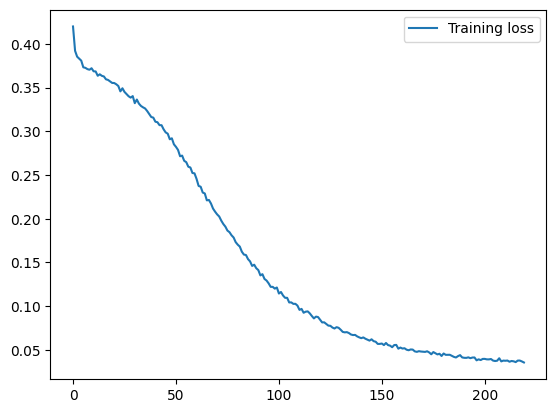

In [15]:
loss = history.history["loss"]
plt.plot(loss, label="Training loss")
plt.legend()
plt.show()

In [16]:
train_score = model.evaluate(X_train, y_train, verbose=0)
train_score

0.03027486987411976

In [17]:
train_Predict = model.predict(X_train)
test_Predict = model.predict(X_test)
predict = np.concatenate((train_Predict, test_Predict), axis=0)

16/16 [==============================] - 0s 2ms/step


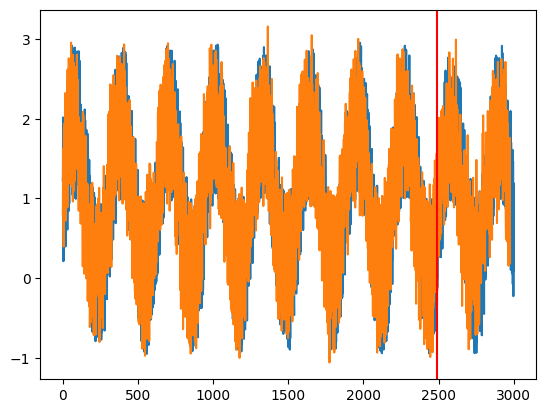

In [18]:
plt.plot(x)
plt.plot(predict)
plt.axvline(len(X_train), c="r")
plt.show()

In [19]:
X_test,y_test =convertToDataset(test,50)

In [20]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
X_test.shape

(450, 50, 1)

In [21]:
test_Predict= model.predict(X_test)

15/15 [==============================] - 0s 3ms/step
